In [387]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [388]:
gdp_df = pd.read_csv("../data/gdp_per_capita.csv", engine='python', skipfooter=2) #filter out footnotes
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2019,2065.036398,NaN
1,Afghanistan,2018,2033.779002,NaN
2,Afghanistan,2017,2058.383832,NaN
3,Afghanistan,2016,2057.062164,NaN
4,Afghanistan,2015,2068.265904,NaN
...,...,...,...,...
6863,Zimbabwe,1994,3263.934978,NaN
6864,Zimbabwe,1993,3033.504852,NaN
6865,Zimbabwe,1992,3054.889178,NaN
6866,Zimbabwe,1991,3426.598094,NaN


**Drop the 'Value Footnotes' column, and rename the remaining columns to ‘Country’, ‘Year’, and ‘GDP_Per_Capita’.



In [389]:
gdp_df1 = (gdp_df
          .drop(columns=['Value Footnotes'])
          .set_axis(["Country","Year","GDP_Per_Capita"], axis = 1)
          )
gdp_df1

,Country,Year,GDP_Per_Capita
0,Afghanistan,2019,2065.036398
1,Afghanistan,2018,2033.779002
2,Afghanistan,2017,2058.383832
3,Afghanistan,2016,2057.062164
4,Afghanistan,2015,2068.265904
...,...,...,...
6863,Zimbabwe,1994,3263.934978
6864,Zimbabwe,1993,3033.504852
6865,Zimbabwe,1992,3054.889178
6866,Zimbabwe,1991,3426.598094


**How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.

In [390]:
print(gdp_df1.dtypes)

Country            object
Year                int64
GDP_Per_Capita    float64
dtype: object


**Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?
*Descending number of observations 

In [391]:
print (gdp_df1.value_counts('Year')) #observations by year


Year
2017    238
2016    238
2015    238
2014    238
2013    238
2011    237
2018    237
2012    237
2009    236
2010    236
2006    235
2007    235
2008    235
2004    234
2005    234
2002    233
2003    233
2001    232
2019    231
2000    231
1999    224
1998    223
1997    223
1996    221
1995    221
1994    214
1993    212
1992    209
1991    208
1990    207
dtype: int64


In [392]:
gdp_df1.Year.unique() #Year sorted

array([2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009,
       2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998,
       1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990], dtype=int64)

**How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?



In [393]:
print (gdp_df1.value_counts('Country'))

Country
Lebanon                      30
Middle income                30
Morocco                      30
Mozambique                   30
Myanmar                      30
                             ..
Nauru                        16
Cayman Islands               13
Sint Maarten (Dutch part)    10
Turks and Caicos Islands      9
Djibouti                      7
Length: 238, dtype: int64


In [394]:
gdp_df1.Country.unique() #Country sorted

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Arab World', 'Argentina', 'Armenia',
       'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', "CÃ´te d'Ivoire", 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Caribbean small states', 'Cayman Islands',
       'Central African Republic', 'Central Europe and the Baltics',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Costa Rica', 'Croatia', 'CuraÃ§ao', 'Cyprus', 'Czech Republic',
       'Dem. Rep. Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Early-demographic dividend',
       'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)',
       'East Asia & Pacific (IDA & IBRD)', 'Ecuador', 'Egypt',

In [395]:
gdp_df1.nunique()

Country            238
Year                30
GDP_Per_Capita    6809
dtype: int64

**Create a new dataframe by subsetting gdp_df to just the year 2014. Call this new dataframe gdp_2014.

**Use .describe() to find the summary statistics for GDP per capita in 2014.

In [396]:
gdp_2014 = gdp_df1[gdp_df1["Year"] == 2014]
print (gdp_2014)

                  Country  Year  GDP_Per_Capita
5             Afghanistan  2014     2102.385234
23                Albania  2014    11623.866679
53                Algeria  2014    11512.705405
83                 Angola  2014     8239.828837
113   Antigua and Barbuda  2014    18104.241470
...                   ...   ...             ...
6727              Vietnam  2014     6098.489609
6757   West Bank and Gaza  2014     5967.073437
6783                World  2014    15189.648507
6813               Zambia  2014     3450.046561
6843             Zimbabwe  2014     2955.240287

[238 rows x 3 columns]


In [397]:
gdp_2014.describe()

,Year,GDP_Per_Capita
count,238.0,238.000000
mean,2014.0,19766.710348
std,0.0,20983.869623
min,2014.0,822.610458
25%,2014.0,4753.110934
50%,2014.0,12209.385755
75%,2014.0,26803.610474
max,2014.0,156514.133850


In [398]:
gdp_2014['GDP_Per_Capita'].describe()

count       238.000000
mean      19766.710348
std       20983.869623
min         822.610458
25%        4753.110934
50%       12209.385755
75%       26803.610474
max      156514.133850
Name: GDP_Per_Capita, dtype: float64

**Create a histogram of GDP Per Capita numbers for 2014 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?
*Unimodal, negative

(array([146.,  41.,  25.,  18.,   4.,   1.,   2.,   0.,   0.,   1.]),
 array([   822.61045782,  16391.76279701,  31960.91513621,  47530.06747541,
         63099.2198146 ,  78668.3721538 ,  94237.524493  , 109806.67683219,
        125375.82917139, 140944.98151059, 156514.13384978]),
 <BarContainer object of 10 artists>)

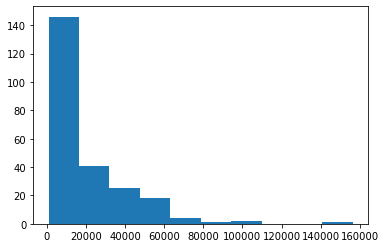

In [399]:
plt.hist(gdp_2014['GDP_Per_Capita'])

**Find the top 5 counties and bottom 5 countries by GDP per capita in 2014.

In [400]:
gdp_2014.sort_values("GDP_Per_Capita")

,Country,Year,GDP_Per_Capita
1047,Central African Republic,2014,822.610458
827,Burundi,2014,886.235777
3781,Malawi,2014,1027.208496
1422,Dem. Rep. Congo,2014,1029.790785
4528,Niger,2014,1127.615541
...,...,...,...
561,Bermuda,2014,77361.104881
5464,Singapore,2014,87808.663157
5138,Qatar,2014,95578.416973
3691,Luxembourg,2014,108760.916030


Now, return to the full dataset, gdp_df. Pivot the data for 1990 and 2017 (using the pandas .pivot_table() method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2017. Save the result to a dataframe named gdp_pivoted.

In [401]:
gdp_pivoted = pd.pivot_table(gdp_df1[gdp_df1['Year'].isin([1990,2017])], 
                             values = 'GDP_Per_Capita' ,
                             index=['Country'], 
                             columns=['Year']
                            )

gdp_pivoted.dropna(inplace = True)

gdp_pivoted

Year,1990,2017
Country,,
Albania,4842.734635,12811.759436
Algeria,8746.352901,11737.409353
Angola,5783.429064,7310.901738
Antigua and Barbuda,15459.551675,19840.076123
Arab World,9694.667544,14555.474921
...,...,...
Vanuatu,2888.309393,3116.645194
Vietnam,1673.249634,7155.745829
World,9680.269697,16253.385518


Create a new column in gdp_pivoted named Percent_Change. This column should contain the percent change in GDP_Per_Capita from 1990 to 2017. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

In [402]:
gdp_pivoted['Percent_change'] = 100 * ((gdp_pivoted[2017] - gdp_pivoted[1990])/gdp_pivoted[1990])
gdp_pivoted

Year,1990,2017,Percent_change
Country,,,
Albania,4842.734635,12811.759436,164.556297
Algeria,8746.352901,11737.409353,34.197756
Angola,5783.429064,7310.901738,26.411194
Antigua and Barbuda,15459.551675,19840.076123,28.335391
Arab World,9694.667544,14555.474921,50.138980
...,...,...,...
Vanuatu,2888.309393,3116.645194,7.905517
Vietnam,1673.249634,7155.745829,327.655604
World,9680.269697,16253.385518,67.902197


How many countries experienced a negative percent change in GDP per capita from 1990 to 2017?

Which country had the highest % change in GDP per capita? Create a line plot showing this country's GDP per capita for all years from 1990 to 2017. Create another showing the country with the second highest % change in GDP. How do the trends in these countries compare?
Bonus: Put both line charts on the same plot.

In [403]:
gdp_pivoted_neg = gdp_pivoted[gdp_pivoted['Percent_change'] < 0]
gdp_pivoted_neg

Year,1990,2017,Percent_change
Country,,,
Brunei,71230.862143,60995.681114,-14.369026
Burundi,1184.842440,773.571858,-34.710993
Central African Republic,1201.677234,912.802052,-24.039332
Comoros,3061.360665,3032.254682,-0.950753
Congo,5115.210903,4274.296414,-16.439488
Dem. Rep. Congo,1819.723315,1059.810775,-41.759785
Gabon,18179.265733,15006.764091,-17.451209
Guinea-Bissau,1994.669656,1925.237737,-3.480873
Haiti,3229.618638,2980.960856,-7.699292


In [404]:
gdp_pivoted_neg.count()

Year
1990              17
2017              17
Percent_change    17
dtype: int64

In [405]:
gdp_pivoted.sort_values('Percent_change', ascending = False)

Year,1990,2017,Percent_change
Country,,,
Equatorial Guinea,1039.985049,22551.083246,2068.404561
China,1423.896348,14344.421239,907.406281
Myanmar,619.645144,4739.910118,664.939443
East Asia & Pacific (excluding high income),2173.223895,12986.322227,497.560254
East Asia & Pacific (IDA & IBRD),2196.950288,13123.151792,497.334945
...,...,...,...
Central African Republic,1201.677234,912.802052,-24.039332
Ukraine,15751.722440,11871.123624,-24.636028
Burundi,1184.842440,773.571858,-34.710993


In [406]:
gdp_pivoted_neg = gdp_pivoted[gdp_pivoted['Percent_change'] < 0]

In [407]:
num_rows = gdp_pivoted_neg.shape[0]
num_rows

17

In [408]:
gdp_EG = gdp_df1[gdp_df1['Country'].isin(['Equatorial Guinea'])]

In [409]:
gdp_EG

,Country,Year,GDP_Per_Capita
1754,Equatorial Guinea,2019,18558.003852
1755,Equatorial Guinea,2018,20359.845144
1756,Equatorial Guinea,2017,22551.083246
1757,Equatorial Guinea,2016,24827.072978
1758,Equatorial Guinea,2015,28313.602763
1759,Equatorial Guinea,2014,32436.466793
1760,Equatorial Guinea,2013,33678.706547
1761,Equatorial Guinea,2012,36671.357436
1762,Equatorial Guinea,2011,35378.023284
1763,Equatorial Guinea,2010,34732.255956


<AxesSubplot:xlabel='Year'>

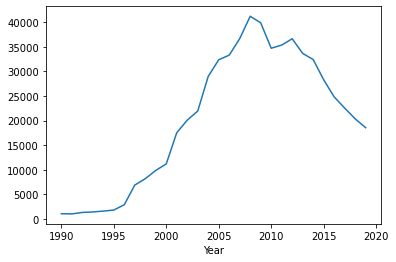

In [410]:
gdp_EG.set_index('Year')['GDP_Per_Capita'].plot()

<AxesSubplot:xlabel='Year'>

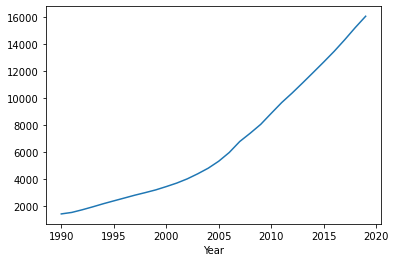

In [411]:
gdp_China = gdp_df1[gdp_df1['Country'].isin(['China'])]
gdp_China.set_index('Year')['GDP_Per_Capita'].plot()

<AxesSubplot:xlabel='Year'>

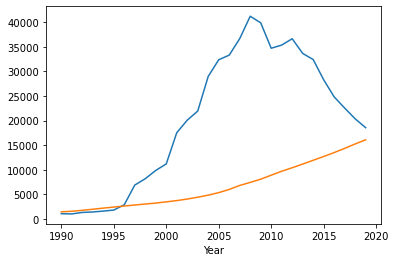

In [412]:
gdp_EG.set_index('Year')['GDP_Per_Capita'].plot()
gdp_China.set_index('Year')['GDP_Per_Capita'].plot()

In [413]:
continents = pd.read_csv(r"C:\Users\j0909\Desktop\data\continents.csv")

In [414]:
gdp_df1 = pd.merge(gdp_df1, continents)
gdp_df1

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2019,2065.036398,Asia
1,Afghanistan,2018,2033.779002,Asia
2,Afghanistan,2017,2058.383832,Asia
3,Afghanistan,2016,2057.062164,Asia
4,Afghanistan,2015,2068.265904,Asia
...,...,...,...,...
5438,Zimbabwe,1994,3263.934978,Africa
5439,Zimbabwe,1993,3033.504852,Africa
5440,Zimbabwe,1992,3054.889178,Africa
5441,Zimbabwe,1991,3426.598094,Africa


In [415]:
Country_per_continent = gdp_df1.groupby(['Continent', 'Country']).size()

In [416]:
gdp_df1['Country'].value_counts()

Japan             30
Ireland           30
Bangladesh        30
Canada            30
Morocco           30
                  ..
Qatar             20
Afghanistan       18
Nauru             16
Cayman Islands    13
Djibouti           7
Name: Country, Length: 188, dtype: int64

In [417]:
Country_per_continent = Country_per_continent.groupby('Continent').count()

<AxesSubplot:xlabel='Continent'>

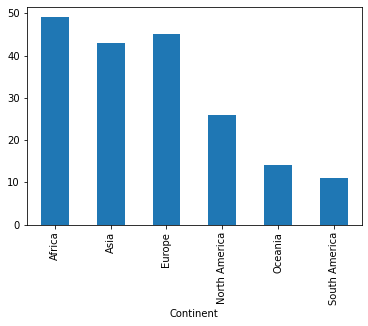

In [418]:
bar.plot.bar(x='Continent')

<AxesSubplot:xlabel='Continent', ylabel='GDP_Per_Capita'>

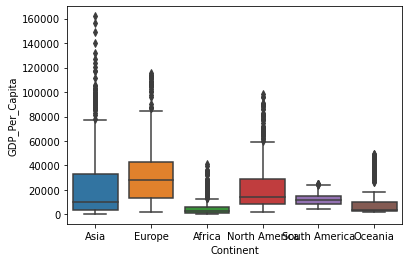

In [419]:
sns.boxplot(data=gdp_df1, x='Continent', y='GDP_Per_Capita')

In [420]:
gdp_df1

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2019,2065.036398,Asia
1,Afghanistan,2018,2033.779002,Asia
2,Afghanistan,2017,2058.383832,Asia
3,Afghanistan,2016,2057.062164,Asia
4,Afghanistan,2015,2068.265904,Asia
...,...,...,...,...
5438,Zimbabwe,1994,3263.934978,Africa
5439,Zimbabwe,1993,3033.504852,Africa
5440,Zimbabwe,1992,3054.889178,Africa
5441,Zimbabwe,1991,3426.598094,Africa


In [421]:
gdp_2014=gdp_df1[gdp_df1['Year'] == 2014]
#sns.boxplot(data=gdp_2014, x='Continent', y='GDP_Per_Capita')

<AxesSubplot:xlabel='Continent', ylabel='GDP_Per_Capita'>

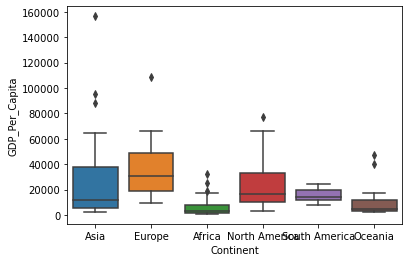

In [422]:
sns.boxplot(data=gdp_2014, x='Continent', y='GDP_Per_Capita')

In [589]:
internet_use=pd.read_csv(r"C:/Users/j0909/Desktop/NSS/un_exploration-jrawdata/data/internet_use.csv", error_bad_lines=False)

b'Skipping line 4675: expected 4 fields, saw 6\n'


In [590]:
internet_use

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
...,...,...,...,...
4670,175,Includes individuals 3 years and older,NaN,NaN
4671,176,NTIA/CPS survey.,NaN,NaN
4672,178,Estimated based on Survey's results. Populatio...,NaN,NaN
4673,179,Preliminary. Country estimate.,NaN,NaN


In [425]:
list(internet_use)

['Country or Area', 'Year', 'Value', 'Value Footnotes']

Drop the Value Footnotes column and then rename the columns to ‘Country’, ‘Year’, and ‘Internet_Users_Pct’.

In [591]:
internet_use.drop('Value Footnotes', inplace=True, axis=1)
internet_use = internet_use.drop(internet_use.index[4495:4675])#footnotes

In [592]:
internet_use.columns = ["Country", "Year", "Internet_Use_Pct"]

In [593]:
internet_use

,Country,Year,Internet_Use_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739


In [594]:
internet_use.dtypes

Country              object
Year                 object
Internet_Use_Pct    float64
dtype: object

In [472]:
internet_sorted = internet_use.sort_values("Year", ascending = True)
internet_sorted

,Country,Year,Internet_Use_Pct
1663,Grenada,1960,0.00
665,Burundi,1960,0.00
3917,Syria,1960,0.00
2558,Maldives,1960,0.00
4018,Thailand,1960,0.00
...,...,...,...
929,Costa Rica,2014,49.41
2642,Mauritius,2014,41.44
953,Cote d'Ivoire,2014,14.60
3366,Saint Kitts and Nevis,2014,65.40


What is the first year that has a nonzero internet users percentage reported? What is the general trend in internet users percentage over the years. Pick a visualization that you think illustrates this trend well.

In [595]:
(internet_sorted.Internet_Use_Pct.values > 0).argmax()

144

In [596]:
internet_sorted.iloc[[144]]

,Country,Year,Internet_Use_Pct
4276,United Kingdom,1990,0.087355


<AxesSubplot:xlabel='Year'>

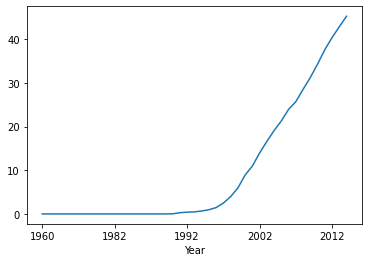

In [597]:
internet_mean = internet_sorted.groupby('Year')['Internet_Use_Pct'].mean()
internet_mean.plot.line()

In [437]:
internet_mean

Year
1960     0.000000
1965     0.000000
1970     0.000000
1975     0.000000
1976     0.000000
1977     0.000000
1978     0.000000
1979     0.000000
1980     0.000000
1981     0.000000
1982     0.000000
1983     0.000000
1984     0.000000
1985     0.000000
1986     0.000000
1987     0.000000
1988     0.000000
1989     0.000000
1990     0.023966
1991     0.280305
1992     0.399037
1993     0.463765
1994     0.665616
1995     0.954541
1996     1.446573
1997     2.472267
1998     3.948702
1999     5.922159
2000     8.886166
2001    10.939164
2002    13.930060
2003    16.586213
2004    19.066754
2005    21.286577
2006    23.918903
2007    25.680517
2008    28.502317
2009    31.223642
2010    34.283033
2011    37.582153
2012    40.353926
2013    42.842633
2014    45.249851
Name: Internet_Use_Pct, dtype: float64

In [607]:
gdp_and_internet_use = pd.merge(gdp_df1, internet_use, how='left')

In [440]:
#gdp_df1['Year'] = gdp_df1['Year'].astype('float64')

In [441]:
#gdp_df1['Year'] = gdp_df1['Year'].astype('int64')

In [603]:
#gdp_df1['Year'] = gdp_df1['Year'].astype('object')

In [451]:
#gdp_df1['Year'] = gdp_df1['Year'].astype('string')

In [608]:
gdp_and_internet_use

,Country,Year,GDP_Per_Capita,Continent,Internet_Use_Pct
0,Afghanistan,2019,2065.036398,Asia,NaN
1,Afghanistan,2018,2033.779002,Asia,NaN
2,Afghanistan,2017,2058.383832,Asia,NaN
3,Afghanistan,2016,2057.062164,Asia,NaN
4,Afghanistan,2015,2068.265904,Asia,NaN
...,...,...,...,...,...
5438,Zimbabwe,1994,3263.934978,Africa,0.001739
5439,Zimbabwe,1993,3033.504852,Africa,NaN
5440,Zimbabwe,1992,3054.889178,Africa,NaN
5441,Zimbabwe,1991,3426.598094,Africa,NaN


In [609]:
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use['Year'].isin(['2014'])]
gdp_and_internet_use_2014

,Country,Year,GDP_Per_Capita,Continent,Internet_Use_Pct
5,Afghanistan,2014,2102.385234,Asia,6.39000
23,Albania,2014,11623.866679,Europe,60.10000
53,Algeria,2014,11512.705405,Africa,18.09000
83,Angola,2014,8239.828837,Africa,21.26000
113,Antigua and Barbuda,2014,18104.241470,North America,64.00000
143,Argentina,2014,23550.099061,South America,64.70000
173,Armenia,2014,11019.838785,Europe,46.30000
201,Aruba,2014,35458.608343,North America,83.78000
231,Australia,2014,47436.748390,Oceania,84.56000
261,Austria,2014,53025.847608,Europe,81.00000


Create a new DataFrame, named gdp_and_internet_use_2014 by extracting data for the year 2014 from gdp_and_internet_use. How many countries have at least 90% internet users in 2014?

In [621]:
gdp_atleast90 = gdp_and_internet_use_2014[gdp_and_internet_use_2014["Internet_Use_Pct"] >= 90]
gdp_atleast90.count()

Country             13
Year                13
GDP_Per_Capita      13
Continent           13
Internet_Use_Pct    13
dtype: int64

Find the countries that had the top 3 largest GDP per capita figures for 2014. Create a seaborn FacetGrid showing the change in internet user percentage over time for these three countries. Each individual figure in the facet grid will represent a single country. What trends do you notice?


In [623]:
Biggest_GDP_2014 = gdp_and_internet_use_2014.nlargest(3, ['GDP_Per_Capita'])
Biggest_GDP_2014

,Country,Year,GDP_Per_Capita,Continent,Internet_Use_Pct
2861,"Macao SAR, China",2014,156514.133850,Asia,NaN
2831,Luxembourg,2014,108760.916030,Europe,94.67
3988,Qatar,2014,95578.416973,Asia,91.49


Find the countries that had the top 3 largest GDP per capita figures for 2014. Create a seaborn FacetGrid showing 
the change in internet user percentage over time for these three countries. Each individual figure in the facet grid 
will represent a single country. What trends do you notice?




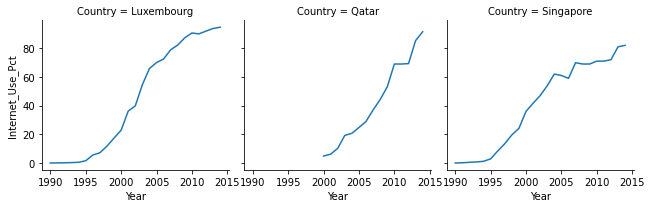

In [460]:
gdp_and_internet_use['Year'] = gdp_and_internet_use['Year'].astype('int64')
MAYBE = gdp_and_internet_use[gdp_and_internet_use['Country'].isin(['Luxembourg', 'Qatar' , 'Singapore'])]
g = sns.FacetGrid(MAYBE, col='Country')
g.map(sns.lineplot, "Year", "Internet_Use_Pct");





<AxesSubplot:xlabel='Internet_Use_Pct', ylabel='GDP_Per_Capita'>

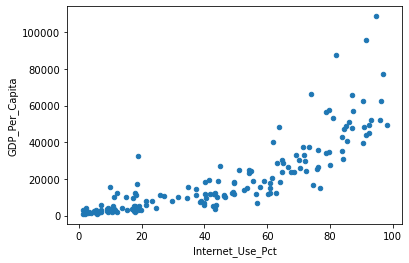

In [461]:
gdp_and_internet_use_2014.plot.scatter(x='Internet_Use_Pct', y='GDP_Per_Capita')

In [462]:
gdp_and_internet_use_2014['Internet_Use_Pct'].corr(gdp_and_internet_use_2014['GDP_Per_Capita'])


0.8246267227541505

Add a column to gdp_and_internet_use_2014 and calculate the logarithm of GDP per capita. Find the correlation between the log of GDP per capita and internet users percentage. How does this compare to the calculation in the previous part?



In [463]:
gdp_and_internet_use_2014['log_GDP'] = np.log(gdp_and_internet_use_2014['GDP_Per_Capita'])

<ipython-input-463-b7da9885a18a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_and_internet_use_2014['log_GDP'] = np.log(gdp_and_internet_use_2014['GDP_Per_Capita'])


In [464]:
gdp_and_internet_use_2014.dtypes

Country              object
Year                 object
GDP_Per_Capita      float64
Continent            object
Internet_Use_Pct    float64
log_GDP             float64
dtype: object

In [465]:
gdp_and_internet_use_2014

,Country,Year,GDP_Per_Capita,Continent,Internet_Use_Pct,log_GDP
0,Afghanistan,2014,2102.385234,Asia,6.39,7.650828
13,Albania,2014,11623.866679,Europe,60.10,9.360816
34,Algeria,2014,11512.705405,Africa,18.09,9.351207
56,Angola,2014,8239.828837,Africa,21.26,9.016735
76,Antigua and Barbuda,2014,18104.241470,North America,64.00,9.803902
...,...,...,...,...,...,...
3351,Uruguay,2014,20582.168953,South America,61.46,9.932180
3373,Uzbekistan,2014,5764.492705,Asia,43.55,8.659472
3394,Vanuatu,2014,3116.077025,Oceania,18.80,8.044330
3414,Zambia,2014,3450.046561,Africa,17.34,8.146143


Filter the original dataset down to just the United States for all available years. Calculate correlation between internet use and gdp per capita. Is this meaningful or useful?



In [466]:
gdp_and_internet_use[gdp_and_internet_use['Country'] == 'United States']

,Country,Year,GDP_Per_Capita,Continent,Internet_Use_Pct
3326,United States,2014,57273.129074,North America,87.360000
3327,United States,2013,56269.956427,North America,84.200000
3328,United States,2012,55632.929764,North America,79.300000
3329,United States,2011,54806.116927,North America,69.729461
3330,United States,2010,54359.133974,North America,71.690000
3331,United States,2009,53440.911538,North America,71.000000
3332,United States,2008,55314.660060,North America,74.000000
3333,United States,2007,55916.715383,North America,75.000000
3334,United States,2006,55411.437548,North America,68.931193
3335,United States,2005,54395.356484,North America,67.968053


In [521]:
gdp_and_internet_use['Internet_Use_Pct'].corr(gdp_and_internet_use['GDP_Per_Capita'])


0.620504880407162

In [549]:
UN_edu_pct = pd.read_csv(r'C:\Users\j0909\Desktop/UN_edu_pct.csv')

In [550]:
#renamed columns to match with gdp_and_internet and removed columns "Sex", "Age group", "Units of Measurement" due to no values
UN_edu_pct = UN_edu_pct.rename(columns={'Reference Area':'Country', 'Time Period' : 'Year', 'Observation Value' : '% spent on education'})
UN_edu_pct.drop(UN_edu_pct.columns[[2,3,4]], axis=1, inplace=True)
UN_edu_pct



,Country,Year,% spent on education
0,Afghanistan,2014,4.80435
1,Afghanistan,2013,4.54436
2,Afghanistan,2012,3.12562
3,Afghanistan,2011,4.08791
4,Afghanistan,2010,4.51116
...,...,...,...
3190,Zimbabwe,1984,5.79150
3191,Zimbabwe,1983,4.14548
3192,Zimbabwe,1981,3.35154
3193,Zimbabwe,1980,2.54418


In [552]:
gdp_and_internet_use

,Country,Year,GDP_Per_Capita,Continent,Internet_Use_Pct
0,Afghanistan,2014,2102.385234,Asia,6.390000
1,Afghanistan,2013,2116.465454,Asia,5.900000
2,Afghanistan,2012,2075.491747,Asia,5.454545
3,Afghanistan,2011,1904.559799,Asia,5.000000
4,Afghanistan,2010,1957.029338,Asia,4.000000
...,...,...,...,...,...
3453,Zimbabwe,1997,3580.048793,Africa,0.033080
3454,Zimbabwe,1996,3520.430146,Africa,0.016790
3455,Zimbabwe,1995,3226.413930,Africa,0.007684
3456,Zimbabwe,1994,3263.934978,Africa,0.001739


In [564]:
gdp_internet_education = pd.merge(gdp_and_internet_use, UN_edu_pct)
gdp_internet_education

,Country,Year,GDP_Per_Capita,Continent,Internet_Use_Pct,% spent on education
0,Afghanistan,2014,2102.385234,Asia,6.390000,4.80435
1,Afghanistan,2013,2116.465454,Asia,5.900000,4.54436
2,Afghanistan,2012,2075.491747,Asia,5.454545,3.12562
3,Afghanistan,2011,1904.559799,Asia,5.000000,4.08791
4,Afghanistan,2010,1957.029338,Asia,4.000000,4.51116
...,...,...,...,...,...,...
1756,Zambia,1995,1908.699005,Africa,0.008784,1.83853
1757,Zambia,1994,1902.393940,Africa,0.006776,1.79352
1758,Zimbabwe,2010,2273.200073,Africa,11.500000,1.97333
1759,Zimbabwe,1994,3263.934978,Africa,0.001739,44.33398


In [566]:
pd.options.display.max_rows = 2000

In [567]:
gdp_internet_education

,Country,Year,GDP_Per_Capita,Continent,Internet_Use_Pct,% spent on education
0,Afghanistan,2014,2102.385234,Asia,6.390000,4.80435
1,Afghanistan,2013,2116.465454,Asia,5.900000,4.54436
2,Afghanistan,2012,2075.491747,Asia,5.454545,3.12562
3,Afghanistan,2011,1904.559799,Asia,5.000000,4.08791
4,Afghanistan,2010,1957.029338,Asia,4.000000,4.51116
5,Albania,2013,11397.576226,Europe,57.200000,3.53800
6,Albania,2007,9179.741136,Europe,15.036115,3.26868
7,Albania,2006,8596.557019,Europe,9.609991,3.15719
8,Albania,2005,8066.557445,Europe,6.043891,3.23872
9,Albania,2004,7604.838002,Europe,2.420388,3.17008
